In [1]:

import intake
from easygems import healpix as egh

import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore", category=FutureWarning) # don't warn us about future package conflicts

In [16]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [2]:
list(intake.open_catalog("https://digital-earths-global-hackathon.github.io/catalog/catalog.yaml"))

['CN', 'EU', 'JAPAN', 'NCAR', 'NERSC', 'UK', 'online']

In [3]:
current_location = "online"
cat = intake.open_catalog("https://digital-earths-global-hackathon.github.io/catalog/catalog.yaml")[current_location]

In [4]:
list(cat)

['ERA5',
 'IR_IMERG',
 'JRA3Q',
 'MERRA2',
 'casesm2_10km_nocumulus',
 'icon_d3hp003',
 'icon_d3hp003aug',
 'icon_d3hp003feb',
 'icon_ngc4008',
 'ifs_tco3999-ng5_deepoff',
 'ifs_tco3999-ng5_rcbmf',
 'ifs_tco3999-ng5_rcbmf_cf',
 'nicam_gl11',
 'scream-dkrz',
 'um_Africa_km4p4_RAL3P3_n1280_GAL9_nest',
 'um_CTC_km4p4_RAL3P3_n1280_GAL9_nest',
 'um_SAmer_km4p4_RAL3P3_n1280_GAL9_nest',
 'um_SEA_km4p4_RAL3P3_n1280_GAL9_nest',
 'um_glm_n1280_CoMA9_TBv1p2',
 'um_glm_n1280_GAL9',
 'um_glm_n2560_RAL3p3']

In [5]:
import pandas as pd

pd.DataFrame(cat["icon_d3hp003"].describe()["user_parameters"])

,name,description,type,allowed,default
0,time,time resolution of the dataset,str,"[PT1H, PT3H, PT6H, P1D]",P1D
1,time_method,time subsetting method,str,"[mean, inst]",mean
2,zoom,zoom resolution of the dataset,int,"[11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0]",0


In [ ]:
ds_z5_t1h = cat["icon_d3hp003"](zoom=5, time_method="inst", time='PT1H').to_dask() 
ds_z5_t3h = cat["icon_d3hp003"](zoom=5, time_method="mean", time='PT3H').to_dask() 
ds_z5_t1D = cat["icon_d3hp003"](zoom=5, time_method="mean", time='P1D').to_dask() 
ds_z10_t1D = cat["icon_d3hp003"](zoom=5, time_method="mean", time='P1D').to_dask() 
# ds_z10 = cat["icon_d3hp003"](zoom=10, time_method="mean", time='P1D').to_dask() 
# ds_z10

In [14]:
ds_z5_t1D

<xarray.Dataset> Size: 6GB
Dimensions:        (time: 425, cell: 12288, crs: 1, pressure: 30,
                    soil_level: 5, pressure_rva: 3)
Coordinates:
  * crs            (crs) float32 4B nan
  * pressure       (pressure) int64 240B 5 10 20 50 ... 92500 95000 97500 100000
  * pressure_rva   (pressure_rva) int64 24B 16 18 23
  * soil_level     (soil_level) int64 40B 0 0 0 2 6
  * time           (time) datetime64[ns] 3kB 2020-01-02 ... 2021-03-01
Dimensions without coordinates: cell
Data variables: (12/58)
    clivi          (time, cell) float32 21MB ...
    clt            (time, cell) float32 21MB ...
    clwvi          (time, cell) float32 21MB ...
    egpvi          (time, cell) float32 21MB ...
    einvi          (time, cell) float32 21MB ...
    ekhvi          (time, cell) float32 21MB ...
    ...             ...
    ua             (time, pressure, cell) float32 627MB ...
    uas            (time, cell) float32 21MB ...
    va             (time, pressure, cell) float32 627MB ...
    vas            (time, cell) float32 21MB ...
    wa             (time, pressure, cell) float32 627MB ...
    zg             (time, pressure, cell) float32 627MB ...

<Figure size 1000x500 with 0 Axes>

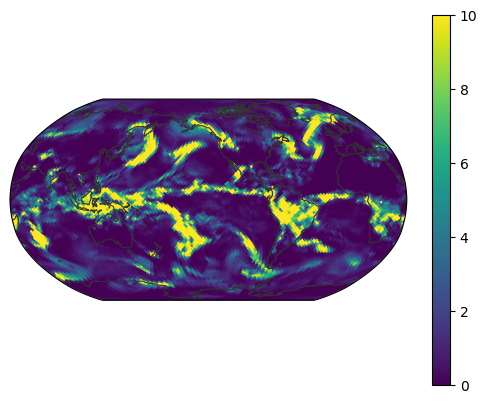

In [ ]:
plt.figure(figsize=(10, 5))
ax = 
cf = egh.healpix_show((ds_z5_t1D.pr.isel(time=0)*86400), vmax=10)
plt.colorbar(cf)


In [ ]:
plt.figure(figsize=(10, 5))
cf = egh.healpix_show((ds_z5_t1D.pr.isel(time=0)*86400), vmax=10)
plt.colorbar(cf)


<xarray.Dataset> Size: 6TB
Dimensions:        (time: 425, cell: 12582912, crs: 1, pressure: 30,
                    soil_level: 5, pressure_rva: 3)
Coordinates:
  * crs            (crs) float32 4B nan
  * pressure       (pressure) int64 240B 5 10 20 50 ... 92500 95000 97500 100000
  * pressure_rva   (pressure_rva) int64 24B 16 18 23
  * soil_level     (soil_level) int64 40B 0 0 0 2 6
  * time           (time) datetime64[ns] 3kB 2020-01-02 ... 2021-03-01
Dimensions without coordinates: cell
Data variables: (12/58)
    clivi          (time, cell) float32 21GB ...
    clt            (time, cell) float32 21GB ...
    clwvi          (time, cell) float32 21GB ...
    egpvi          (time, cell) float32 21GB ...
    einvi          (time, cell) float32 21GB ...
    ekhvi          (time, cell) float32 21GB ...
    ...             ...
    ua             (time, pressure, cell) float32 642GB ...
    uas            (time, cell) float32 21GB ...
    va             (time, pressure, cell) float32 642GB ...
    vas            (time, cell) float32 21GB ...
    wa             (time, pressure, cell) float32 642GB ...
    zg             (time, pressure, cell) float32 642GB ...